In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('card_transdata.csv')

data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
data[data['fraud']==1].head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# According to Kaggle where we've obtained this dataset from: 
## This Dataset sourced by some unnamed institute.

## Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

# Data preprocessing
## Data cleaning

In [7]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

No missing values are present in the dataset

In [8]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


There were no duplicate rows. Also we can see that all of the columns are already numerical.

In [9]:
print(data['fraud'].value_counts())

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


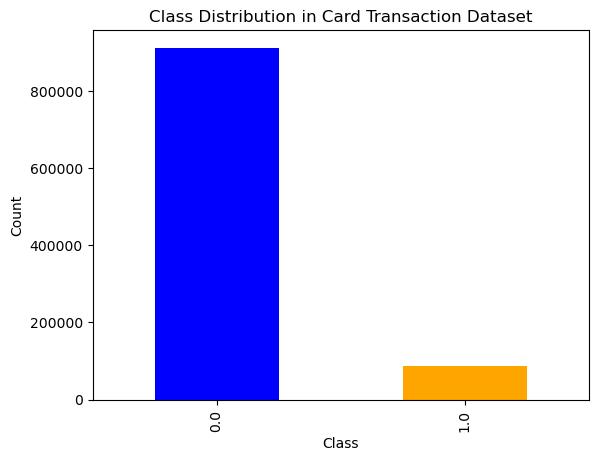

In [6]:
class_counts = data['fraud'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution in Card Transaction Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

We can see that out of 1 million entries, 8,7% are fraud data. The data is imbalanced.

## Feature engineering

First, let's see whether any variables are correlated 

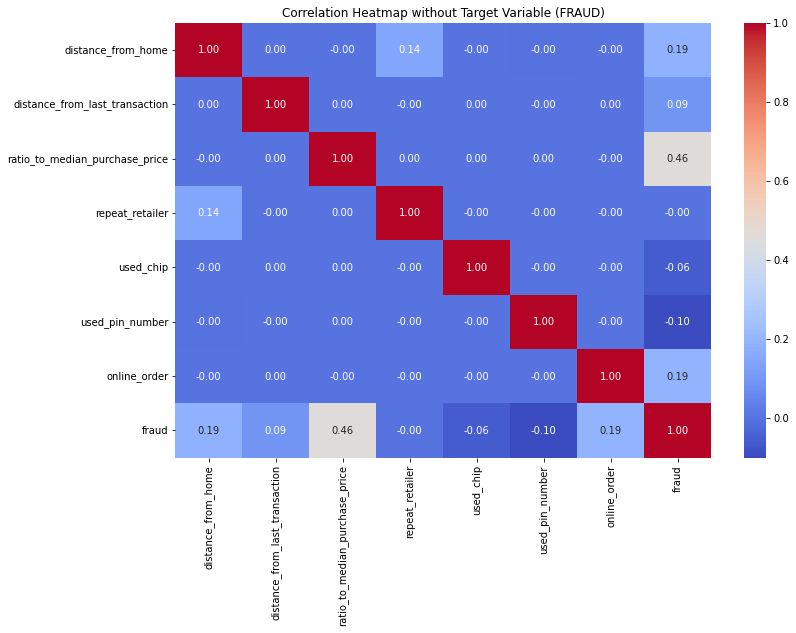

In [5]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap without Target Variable (FRAUD)')
plt.show()

No variables have high correlation. So, correlated varialbes aren't a problem.

Then, we're moving on to normalizing 	distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price. None of the variables obey Gaussian distribution, so we chose it instead of standartization.

In [7]:
min_value = data['ratio_to_median_purchase_price'].min()
max_value = data['ratio_to_median_purchase_price'].max()
data['ratio_normalized'] = (data['ratio_to_median_purchase_price'] - min_value) / (max_value - min_value)

data.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,ratio_normalized
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,0.007250
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,0.004816
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,0.001581
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0.001338
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,0.008284


In [8]:
min_value = data['distance_from_home'].min()
max_value = data['distance_from_home'].max()
data['distance_from_home_normalized'] = (data['distance_from_home'] - min_value) / (max_value - min_value)

data.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,ratio_normalized,distance_from_home_normalized
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,0.007250,0.005443
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,0.004816,0.001018
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,0.001581,0.000478
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0.001338,0.000211
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,0.008284,0.004156


In [9]:
min_value = data['distance_from_last_transaction'].min()
max_value = data['distance_from_last_transaction'].max()
data['distance_from_last_transaction_normalized'] = (data['distance_from_last_transaction'] - min_value) / (max_value - min_value)

data.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,ratio_normalized,distance_from_home_normalized,distance_from_last_transaction_normalized
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,0.007250,0.005443,0.000026
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,0.004816,0.001018,0.000015
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,0.001581,0.000478,0.000068
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0.001338,0.000211,0.000473
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,0.008284,0.004156,0.000048


## Splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import BaggingClassifier

In [24]:
X = data.drop(columns=['ratio_to_median_purchase_price', 'distance_from_last_transaction', 'distance_from_home', 'fraud'])
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Checking proportion of classes

In [26]:
print('Distribution of classes in original dataset, train and test (precentage):')
print('initial: \n', data['fraud'].value_counts()/data['fraud'].size*100)
print('train: \n', y_train.value_counts()/y_train.size*100)
print('test: \n', y_test.value_counts()/y_test.size*100)

Distribution of classes in original dataset, train and test (precentage):
initial: 
 0.0    91.2597
1.0     8.7403
Name: fraud, dtype: float64
train: 
 0.0    91.246571
1.0     8.753429
Name: fraud, dtype: float64
test: 
 0.0    91.290333
1.0     8.709667
Name: fraud, dtype: float64


The classes are distributed proportionally, about 91.3% against 8.7%. Now we want to handle the imbalance of  the data before training our models using oversampling.

In [29]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
data_ros = pd.concat([X_train_ros, y_train_ros], axis=1)
print(data_ros['fraud'].value_counts())

0.0    638726
1.0    638726
Name: fraud, dtype: int64


## Testing various models (logistic regression, decision tree, random forest)

In [32]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


kf = KFold(n_splits=5, shuffle=True, random_state=42)


results = []


for model_name, model in models.items():
    
    precision_scores = cross_val_score(model, X_train_ros, y_train_ros, cv=kf, scoring='precision')
    recall_scores = cross_val_score(model, X_train_ros, y_train_ros, cv=kf, scoring='recall')
    f1_scores = cross_val_score(model, X_train_ros, y_train_ros, cv=kf, scoring='f1_weighted')
    roc_auc_scores = cross_val_score(model, X_train_ros, y_train_ros, cv=kf, scoring='roc_auc')
    
    results.append({
        'Model': model_name,
        'Precision Mean': precision_scores.mean(),
        'Precision Std': precision_scores.std(),
        'Recall Mean': recall_scores.mean(),
        'Recall Std': recall_scores.std(),
        'F1 Mean': f1_scores.mean(),
        'F1 Std': f1_scores.std(),
        'ROC AUC Mean': roc_auc_scores.mean(),
        'ROC AUC Std': roc_auc_scores.std(),
    })

df_results = pd.DataFrame(results)
display(df_results)

,Model,Precision Mean,Precision Std,Recall Mean,Recall Std,F1 Mean,F1 Std,ROC AUC Mean,ROC AUC Std
0,Logistic Regression,0.922351,0.000624,0.92091,0.001342,0.921691,0.000881,0.972851,0.001290
1,Decision Tree,0.999992,0.000007,1.00000,0.000000,0.999996,0.000004,0.999996,0.000004
2,Random Forest,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000


We see that random forest has best performance, we will tune it to ensure that we get the optimal model

## Finding best hyperparameters

In [33]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1 
)


random_search.fit(X_train_ros, y_train_ros)
best_rf = random_search.best_estimator_
print(f'Best Parameters for Tuned Random Forest: {random_search.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\lib\site-packages\skle

Best Parameters for Tuned Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=10, bootstrap=False, random_state=42)

precision = cross_val_score(rf_classifier, X_train_ros, y_train_ros, cv=kf, scoring='precision')
recall = cross_val_score(rf_classifier, X_train_ros, y_train_ros, cv=kf, scoring='recall')
f1 = cross_val_score(rf_classifier, X_train_ros, y_train_ros, cv=kf, scoring='f1_weighted')
roc_auc = cross_val_score(rf_classifier, X_train_ros, y_train_ros, cv=kf, scoring='roc_auc')
print(f'{model_name} Precision: {precision.mean():.4f} ± {precision.std():.4f}')
print(f'{model_name} Recall: {recall.mean():.4f} ± {recall.std():.4f}')
print(f'{model_name} ROC_AUC: {roc_auc.mean():.4f} ± {roc_auc.std():.4f}')
print(f'{model_name} F1: {f1.mean():.4f} ± {f1.std():.4f}')

Random Forest Precision: 1.0000 ± 0.0000
Random Forest Recall: 1.0000 ± 0.0000
Random Forest ROC_AUC: 1.0000 ± 0.0000
Random Forest F1: 1.0000 ± 0.0000


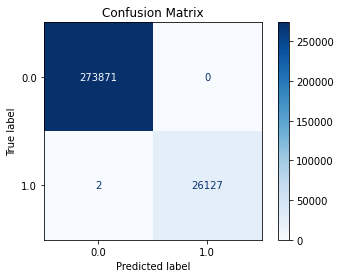

Confusion Matrix:
[[273871      0]
 [     2  26127]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273871
         1.0       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



In [39]:
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))